In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
x = np.linspace(-5, 5, 1000)

In [78]:
def gauss(x, mu=0.0, sig=1.0):
    # Not normalizing the peak
    # fp = 1 / np.sqrt(2 * np.pi * sig * sig)
    fp = 1
    num = -(x - mu) ** 2
    den = 2 * sig * sig
    sp = np.exp(num / den)
    return fp * sp

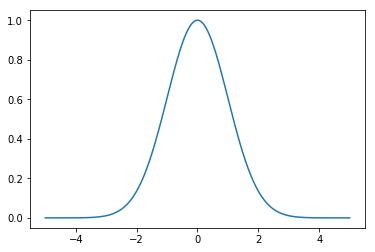

In [79]:
plt.plot(x, gauss(x))

In [80]:
def error(yt, yp):
    return 0.5 * (yt - yp) ** 2

In [81]:
yt = gauss(x)

In [83]:
class Neuron():
    def __init__(self):
        self._sigma = np.random.rand()
        self._lr = 0.01
        
    def predict(self, x):
        return np.exp(-x**2 / (2 * self._sigma ** 2))
    
    def fit(self, x, y):
        yp = self.predict(x)
        
        self._sigma -= self._lr * (y - yp) * yp * x * (self._sigma ** -3)

In [84]:
n = Neuron()

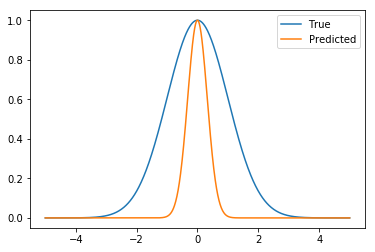

In [85]:
plt.plot(x, yt, label='True')
plt.plot(x, n.predict(x), label='Predicted')
plt.legend(loc='best')

In [86]:
n._sigma

0.32102481999542065

In [87]:
n._lr = 0.01

In [88]:
for epoch in range(1000):
    for xi, yi in zip(x, yt):
        n.fit(xi, yi)

In [89]:
n._sigma

0.9567170356069679

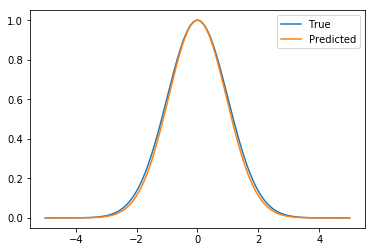

In [90]:
plt.plot(x, yt, label='True')
plt.plot(x, n.predict(x), label='Predicted')
plt.legend(loc='best')

In [92]:
for epoch in range(1000):
    for xi, yi in zip(x, yt):
        n.fit(xi, yi)

In [93]:
n._sigma

0.9912352290840384

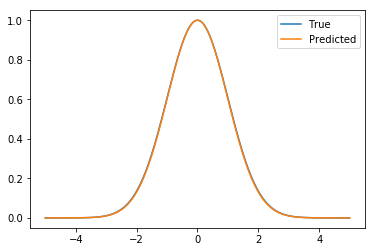

In [94]:
plt.plot(x, yt, label='True')
plt.plot(x, n.predict(x), label='Predicted')
plt.legend(loc='best')